<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B2%D1%85%D0%BE%D0%B4%D0%BE%D0%B2_%D0%B8_%D0%BE%D0%B4%D0%B8%D0%BD_%D0%B2%D1%8B%D1%85%D0%BE%D0%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ООО "Университет Цифровых Технологий платформа 3"

# Регрессия. Много входов и один выход. 
В данном модуле мы рассмотрим, что такое регрессия. Определим понятие и особенности решения задачи регрессии с помощью нейронных сетей. Рассмотрим прaктическое применение задачи регрессии на примере трех задач.

Регрессия - это когда мы прогнозируем непрерывные данные, на основе установления зависимости с входными данными. 

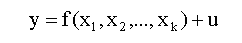

В этом примере регрессия Y на X является линейной функцией. Если регрессия Y на X отлична от линейной, то приведённые уравнения — это линейная аппроксимация истинного уравнения регрессии.

В общем случае регрессия одной случайной переменной на другую не обязательно будет линейной. Также не обязательно ограничиваться парой случайных переменных. Статистические проблемы регрессии связаны с определением общего вида уравнения регрессии, построением оценок неизвестных параметров, входящих в уравнение регрессии, и проверкой статистических гипотез о регрессии. Эти проблемы рассматриваются в рамках регрессионного анализа.

Нейронная сеть позволяет решать задачи регрессии, которые не подчиняются линейным зависимостям. Нейронные сети по сравнению с традиционным регрессионным анализом, в частности, при аппроксимации нелинейных зависимостей вида могут:
- Нейронная сеть способна со сколь угодно заданной точностью воспроизводить (аппроксимировать) произвольные нелинейные зависимости, вид которых заранее неизвестен.
- Нейронная сеть сама в процессе обучения определяет вид функциональной зависимости.
- Нейронная сеть способна улавливать скрытые нелинейные зависимости.
- Нейронная сеть способна обучаться на примерах и в процессе обучения перестраивать свою архитектуру. При этом происходит как бы автоматическая спецификация модели.
- Нейронная сеть способна адаптироваться к изменившимся условиям.
- С помощью нейронной сети можно аппроксимировать многомерные зависимости, описываемые не одним уравнением, а системой нелинейных взаимосвязанных уравнений.


## Рассмотрим решение задачи регрессии с помощью нейронных сетей: Определение стоимости автомобиля на основе базы автомобилей Drom.


###Подключаем необходимые модули.

In [ ]:
from tensorflow.keras.models import Sequential, load_model # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization # Подключаем класс Dense - полносвязный слой, и Flatten - данные выстраиваем в линию, одномерные
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical

import tensorflow as tf # импортируем tensorflow

# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделения на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # для построения матрицы ошибок
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # для нормализации данных

import numpy as np # Подключаем библиотеку numpy
import pandas as pd # Библиотека pandas

import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений

#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [ ]:
#запускаем - подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
#после запуска переходим по ссылке, которая появится, для идентификации
#копируем оттуда код authorization code и вставляем здесь в окошко
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Анализ и обработка данных

In [ ]:
df_drom = pd.read_excel('/content/drive/My Drive/datasets/Drom/drom-2021.xls') # загружаем базу данных Drom.

In [ ]:
df_drom.head() # выведем первые пять строк, для того, что бы удостовериться, о корректности загрузки.

,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
0,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,NaN,NaN,Краснодар,1175000,белый,левый,NaN
1,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,NaN,NaN,Краснодар,1175000,коричневый,левый,NaN
2,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,NaN,Краснодар,1469900,голубой,левый,NaN
3,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,серебристый,левый,NaN
4,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,белый,левый,NaN


In [ ]:
df_drom.shape # выведем размерность загруженной базы.

(65535, 15)

In [ ]:
df_drom.tail() # выведем пять последних записей загруженного датасета.

,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
65530,Toyota,Vista,1993,1800.0,бензин,125.0,автомат,передний,NaN,NaN,Чернышевск,80000,серый,правый,3.0
65531,Toyota,Vista,1994,1800.0,бензин,125.0,автомат,передний,327000.0,NaN,Поспелиха,195000,NaN,правый,4.0
65532,Toyota,Vista,1998,2000.0,бензин,140.0,автомат,передний,300000.0,NaN,Тюмень,250000,зеленый,правый,4.0
65533,Toyota,Vista,2000,2000.0,бензин,145.0,автомат,передний,300000.0,NaN,Бийск,210000,серый,правый,5.0
65534,Toyota,Vista,1995,1800.0,бензин,125.0,автомат,передний,370000.0,1.8 VX,Карасук,175000,зеленый,правый,4.0


### Обработка пропусков в данных.
Зачастую не существует шаблонных подходов к этой задаче, поскольку подходы во многом зависит от контекста и характера данных. Например, являются ли данные случайными пропусками или же есть скрытая связь между пропусками и некоторым другим записями в обучающем примере?
Один из способов простых способов решения этой проблемы - просто игнорировать или удалять строки или столбцы, в которых отсутствуют данные, выбрасывая их из нашего анализа. Однако этот метод может быть плох из-за потери информации.
Еще один способ — это заполнение пропусков, где мы заменяем отсутствующее значение каким-либо образом. Базовые реализации просто заменят все отсутствующие значения средним, медианным, либо же константой.

In [ ]:
columns_list = df_drom.columns # сформируем  список столбцов
print(columns_list[1]) # выведем наименование столбца № 1

Модель


In [ ]:
n_l = 6 # проанализируем некоторые значения колонок по номеру столбца
print(columns_list[n_l], 'уникальных значений ',df_drom.iloc[:,n_l].nunique())
df_drom.iloc[:,n_l].unique()

Трансмиссия уникальных значений  2


array(['механика', 'автомат', nan], dtype=object)

In [ ]:
df_drom.info() # Проверяем значение каждой колонки должны иметь заданный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Бренд         65535 non-null  object 
 1   Модель        65535 non-null  object 
 2   Год (да/нет)  65535 non-null  int64  
 3   Объём         64104 non-null  float64
 4   Топливо       62372 non-null  object 
 5   Мощность      63520 non-null  float64
 6   Трансмиссия   64289 non-null  object 
 7   Привод        64438 non-null  object 
 8   Пробег        54248 non-null  float64
 9   Комплектация  29948 non-null  object 
 10  Город         65535 non-null  object 
 11  Цена          65535 non-null  int64  
 12  Цвет          59735 non-null  object 
 13  Руль          65535 non-null  object 
 14  Поколение     57360 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 7.5+ MB


In [ ]:
df_drom.isna().sum() # Для начала выясним, количество незаполненных ячеек и что делать с пропущенными значениями.

Бренд               0
Модель              0
Год (да/нет)        0
Объём            1431
Топливо          3163
Мощность         2015
Трансмиссия      1246
Привод           1097
Пробег          11287
Комплектация    35587
Город               0
Цена                0
Цвет             5800
Руль                0
Поколение        8175
dtype: int64

In [ ]:
df_drom.describe() # Проверяем числовые значения и даты, проверяем на предмет нахождения в границах "допустимых значений"

,Год (да/нет),Объём,Мощность,Пробег,Цена,Поколение
count,65535.000000,64104.000000,63520.000000,54248.000000,6.553500e+04,57360.000000
mean,2005.836957,1963.982107,136.465743,169386.763549,6.544134e+05,2.102946
std,8.744362,832.856190,69.464136,98479.349725,1.137226e+06,1.930544
min,1940.000000,400.000000,1.000000,1.000000,6.000000e+03,1.000000
25%,2000.000000,1500.000000,97.000000,100000.000000,2.300000e+05,1.000000
50%,2007.000000,1800.000000,120.000000,158773.000000,3.880000e+05,1.000000
75%,2013.000000,2000.000000,150.000000,225000.000000,6.890000e+05,2.000000
max,2021.000000,10000.000000,2000.000000,999999.000000,9.006000e+07,11.000000


Заполняем колонки с пустыми значениями.

In [ ]:
#  3 Объём         64104  уникальных значений: 251
maskValue = df_drom.iloc[:,3].isna() # создаем маску с пустыми значениями для колонки "Объем"
df_val = df_drom.loc[maskValue,:] # создаем вспомогательным датафрейм
print(df_val.shape) # выведем размерность этого датафрейма
df_val.head(10) # выведем на экран строки с пустыми значениями для колонки "Объем"

(1431, 15)


,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
100,Alfa Romeo,156,2002,NaN,NaN,NaN,NaN,NaN,215000.0,NaN,Челябинск,150000,красный,левый,1.0
107,Alfa Romeo,75,1988,NaN,дизель,95.0,механика,передний,190000.0,NaN,Севастополь,65000,синий,левый,NaN
226,Brilliance,M2,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Красноярск,199000,серый,левый,1.0
489,Changan,CS35,2018,NaN,бензин,NaN,автомат,передний,39432.0,NaN,Казань,709000,коричневый,левый,NaN
767,Acura,RDX,2010,NaN,NaN,NaN,NaN,NaN,110000.0,NaN,Магнитогорск,825000,черный,левый,1.0
1088,Cadillac,CTS,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Барнаул,285000,NaN,левый,1.0
1099,Cadillac,SRX,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Анжеро-Судженск,370000,серый,левый,1.0
1226,Brilliance,V5,2017,NaN,бензин,NaN,механика,передний,20761.0,NaN,Уфа,755000,коричневый,левый,NaN
1247,Cadillac,SRX,2014,NaN,бензин,NaN,автомат,4WD,179969.0,NaN,Санкт-Петербург,1415000,черный,левый,NaN
1263,Maserati,Quattroporte,2007,NaN,NaN,NaN,NaN,NaN,105000.0,NaN,Краснодар,1437000,черный,левый,5.0


In [ ]:
df_drom[(df_drom.iloc[:,0] == 'Alfa Romeo') & (df_drom.iloc[:,1] == 156) & (df_drom.iloc[:,2] == 2002)]
# вручную проверим есть ли значения идентичные первой строке предыдущей таблицы, как видим есть точное совпадение можно взять значение "Объем"

,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
100,Alfa Romeo,156,2002,NaN,NaN,NaN,NaN,NaN,215000.0,NaN,Челябинск,150000,красный,левый,1.0
618,Alfa Romeo,156,2002,2000.0,бензин,150.0,механика,передний,NaN,2.0 MT T.Spark,Нерюнгри,298000,серебристый,левый,1.0
807,Alfa Romeo,156,2002,2000.0,бензин,155.0,механика,NaN,251000.0,NaN,Курган,195000,красный,левый,1.0


In [ ]:
# для нахождения нужного значения прменим такую формулу
df_drom.iloc[(df_drom[(df_drom.iloc[:,0] == 'Alfa Romeo') & (df_drom.iloc[:,1] == 156) & (df_drom.iloc[:,2] == 2002)].index),3].max()

2000.0

In [ ]:
# например среднее значение мощности автомобиля 'Alfa Romeo', если предыдущий код не принес результата
round(df_drom.iloc[(df_drom[df_drom.iloc[:,0] == 'Alfa Romeo']).index,3].mean(),1) 

1888.3

In [ ]:
# создадим вспомогательную функцию для определния значения объема по 3 ключевым параметрам
def Value_det (a1,a2,a3,n_columns): 
    # пробуем получить значение по трем ключевым значениям 'Бренд', 'Модель', 'Год'
    answ = df_drom.iloc[(df_drom[(df_drom.iloc[:,0] == a1) & (df_drom.iloc[:,1] == a2) & (df_drom.iloc[:,2] == a3)].index),n_columns].max()
    if pd.isna(answ): # в случае если нет такого значения возвращаем среденее значение в базе этого 'Бренда'
        answ = round(df_drom.iloc[(df_drom[df_drom.iloc[:,0] == a1]).index,n_columns].mean(),1)
    else: return answ
    # в случае если нет такого значения с этим авто возвращаем среденее значение по всей базе
    if pd.isna(answ): answ = round(df_drom.iloc[:,n_columns].mean(),1)
    return answ


In [ ]:
list_val = df_val.iloc[:,[0,1,2]].values.tolist() # создадим списко ключевых значений для того, что бы пробежаться по значениям

In [ ]:
list_value =[Value_det(a1,a2,a3,3) for a1,a2,a3 in list_val] # создадим вспомогательный список со значениям поля "Объем"
df_val.loc[:,'New'] = list_value # присвоим новой колонке значения списка с рассчитанными значениями

In [ ]:
df_val.iloc[:,[0,1,2,15]] # выведем новое поле с рассчитаными значениями

,Бренд,Модель,Год (да/нет),New
100,Alfa Romeo,156,2002,2000.0
107,Alfa Romeo,75,1988,1888.3
226,Brilliance,M2,2007,1800.0
489,Changan,CS35,2018,1600.0
767,Acura,RDX,2010,2300.0
...,...,...,...,...
65035,Toyota,Probox,2004,1500.0
65306,Toyota,Probox,2016,1500.0
65379,Toyota,Probox,2016,1500.0
65449,Toyota,Probox,2002,1500.0


In [ ]:
df_drom.iloc[:,3].fillna(value=df_val.iloc[:,15],inplace=True) # заполняем все значения поля "Объем", имеющие пустые значения.

In [ ]:
df_drom.iloc[100:108,:] # обратим внимание строка 100 и 107, они приобрели значение!

,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
100,Alfa Romeo,156,2002,2000.0,NaN,NaN,NaN,NaN,215000.0,NaN,Челябинск,150000,красный,левый,1.0
101,Alfa Romeo,156,1999,2000.0,бензин,155.0,механика,передний,178000.0,2.0 MT T.Spark,Симферополь,79000,черный,левый,1.0
102,Alfa Romeo,GT,2008,2000.0,бензин,165.0,автомат,передний,169050.0,2.0 AMT,Москва,499000,красный,левый,1.0
103,Alfa Romeo,156,2000,1700.0,бензин,144.0,механика,передний,300000.0,1.8 MT T.Spark,Симферополь,99000,серебристый,левый,1.0
104,Alfa Romeo,147,2001,2000.0,бензин,150.0,механика,передний,200000.0,2.0 MT T.Spark,Новосибирск,350000,голубой,левый,1.0
105,Alfa Romeo,147,2007,2000.0,бензин,150.0,автомат,передний,70000.0,2.0 AMT T.Spark Selespeed,Кемерово,450000,черный,левый,1.0
106,Alfa Romeo,159,2007,2200.0,бензин,185.0,автомат,передний,200000.0,NaN,Симферополь,690000,бордовый,левый,1.0
107,Alfa Romeo,75,1988,1888.3,дизель,95.0,механика,передний,190000.0,NaN,Севастополь,65000,синий,левый,NaN


In [ ]:
df_drom.loc[df_drom.iloc[:,3].isna(),:] # проверим остались ли пустые значения в поле "Объем"

,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение


In [ ]:
#  5 Мощность      63520  уникальных значений: 395
maskValue = df_drom.iloc[:,5].isna() # создаем маску с пустыми значениями для колонки "Мощность"
df_val = df_drom.loc[maskValue,:] # создаем вспомогательным датафрейм
print(df_val.shape)
df_val.head(10) # выведем на экран строки с пустыми значениями для колонки "Мощность"

(2015, 15)


,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
100,Alfa Romeo,156,2002,2000.0,NaN,NaN,NaN,NaN,215000.0,NaN,Челябинск,150000,красный,левый,1.0
163,Changan,CS35,2013,1598.0,бензин,NaN,механика,передний,49564.0,NaN,Воронеж,499000,серебристый,левый,NaN
226,Brilliance,M2,2007,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,Красноярск,199000,серый,левый,1.0
453,Brilliance,V5,2015,1600.0,бензин,NaN,NaN,передний,56831.0,NaN,Москва,588000,коричневый,левый,1.0
489,Changan,CS35,2018,1600.0,бензин,NaN,автомат,передний,39432.0,NaN,Казань,709000,коричневый,левый,NaN
521,CheryExeed,TXL,2020,1000.0,бензин,NaN,автомат,4WD,NaN,NaN,Санкт-Петербург,2399900,NaN,левый,NaN
750,CheryExeed,TXL,2020,1000.0,бензин,NaN,автомат,4WD,NaN,NaN,Санкт-Петербург,2399900,белый,левый,NaN
752,CheryExeed,TXL,2020,1000.0,бензин,NaN,автомат,4WD,NaN,NaN,Санкт-Петербург,2399900,NaN,левый,NaN
767,Acura,RDX,2010,2300.0,NaN,NaN,NaN,NaN,110000.0,NaN,Магнитогорск,825000,черный,левый,1.0
1068,Cadillac,XT6,2019,2000.0,бензин,NaN,автомат,4WD,22417.0,NaN,Москва,4200000,серый,левый,1.0


In [ ]:
list_val = df_val.iloc[:,[0,1,2]].values.tolist() # переводим для того, что бы пробежаться по значениям
list_value =[Value_det(a1,a2,a3,5) for a1,a2,a3 in list_val] # создадим вспомогательный список со значениям поля "Мощность"
len(list_value)


2015

In [ ]:
df_val.loc[:,'New'] = list_value # присвоим новой колонке значения списка с рассчитанными значениями 

In [ ]:
df_val.iloc[:,[0,1,2,5,15]] # выведем новое поле с рассчитаными значениями

,Бренд,Модель,Год (да/нет),Мощность,New
100,Alfa Romeo,156,2002,NaN,155.0
163,Changan,CS35,2013,NaN,113.0
226,Brilliance,M2,2007,NaN,136.0
453,Brilliance,V5,2015,NaN,110.0
489,Changan,CS35,2018,NaN,113.0
...,...,...,...,...,...
65379,Toyota,Probox,2016,NaN,109.0
65410,Toyota,Vista,1988,NaN,140.0
65449,Toyota,Probox,2002,NaN,109.0
65501,Toyota,Probox,2009,NaN,109.0


In [ ]:
df_drom.iloc[:,5].fillna(value=df_val.iloc[:,15],inplace=True) # заполняем все значения поля "Объем", имеющие пустые значения.

In [ ]:
df_drom.iloc[100:164,:] # обратим внимание строка 100 и 163, они приобрели значение!

,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
100,Alfa Romeo,156,2002,2000.0,NaN,155.0,NaN,NaN,215000.0,NaN,Челябинск,150000,красный,левый,1.0
101,Alfa Romeo,156,1999,2000.0,бензин,155.0,механика,передний,178000.0,2.0 MT T.Spark,Симферополь,79000,черный,левый,1.0
102,Alfa Romeo,GT,2008,2000.0,бензин,165.0,автомат,передний,169050.0,2.0 AMT,Москва,499000,красный,левый,1.0
103,Alfa Romeo,156,2000,1700.0,бензин,144.0,механика,передний,300000.0,1.8 MT T.Spark,Симферополь,99000,серебристый,левый,1.0
104,Alfa Romeo,147,2001,2000.0,бензин,150.0,механика,передний,200000.0,2.0 MT T.Spark,Новосибирск,350000,голубой,левый,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Changan,CS75,2020,1800.0,бензин,150.0,автомат,передний,NaN,NaN,Тюмень,1909900,белый,левый,NaN
160,Changan,CS35,2017,1600.0,бензин,113.0,автомат,передний,72000.0,NaN,Москва,720000,черный,левый,1.0
161,Changan,CS35,2018,1600.0,бензин,113.0,автомат,передний,30000.0,NaN,Абакан,750000,белый,левый,1.0
162,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Красноярск,1469900,белый,левый,NaN


In [ ]:
df_drom.loc[df_drom.iloc[:,5].isna(),:] # проверим остались ли пустые значения в поле "Мощность"

,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение


In [ ]:
#  4 Топливо       62372  уникальных значений: 4
colum_num = 4
# создадим вспомогательную функцию для определния значения объема по 3 параметрам 
def Value_string_det (a1,a2,a3,n_columns):
    try: # пробуем получить значение по трем ключевым значениям 'Бренд', 'Модель', 'Год'
        answ = df_drom.iloc[ ( df_drom[((df_drom.iloc[:,0] == a1) & (df_drom.iloc[:,1] == a2) & (df_drom.iloc[:,2] == a3))] ).index,\
                            n_columns ].value_counts().index[0]
    except:
        try: # в случае если операция не дала результа определяем значение поля на основе 'Бренд' и максимально частоты использования. 
            answ = df_drom.iloc[(df_drom[df_drom.iloc[:,0] == a1]).index,n_columns].value_counts().index[0]
        except: # в случае если с помощью предыдущих операций, мы не получили результат, то возвращаем значение, чаще встречающееся по все базе
            answ = df_drom.iloc[:,n_columns].value_counts().index[0]
    
    return answ

In [ ]:
maskValue = df_drom.iloc[:,colum_num].isna() # создаем маску с пустыми значениями для колонки "Топливо"
df_val = df_drom.loc[maskValue,:] # создаем вспомогательным датафрейм
print(df_val.shape) # выведем размерность этого дата фрейма
df_val.head(10) # выведем на экран строки с пустыми значениями для колонки "Топливо"

(3163, 15)


,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
100,Alfa Romeo,156,2002,2000.0,NaN,155.0,NaN,NaN,215000.0,NaN,Челябинск,150000,красный,левый,1.0
226,Brilliance,M2,2007,1800.0,NaN,136.0,NaN,NaN,NaN,NaN,Красноярск,199000,серый,левый,1.0
326,Changan,CS35,2019,1600.0,NaN,117.0,NaN,передний,29000.0,NaN,Тюмень,1200000,белый,левый,1.0
767,Acura,RDX,2010,2300.0,NaN,240.0,NaN,NaN,110000.0,NaN,Магнитогорск,825000,черный,левый,1.0
1088,Cadillac,CTS,2006,4600.0,NaN,325.0,NaN,NaN,NaN,NaN,Барнаул,285000,NaN,левый,1.0
1099,Cadillac,SRX,2004,4600.0,NaN,320.0,NaN,NaN,NaN,NaN,Анжеро-Судженск,370000,серый,левый,1.0
1202,FAW,Vita,2007,1300.0,NaN,92.0,NaN,NaN,130000.0,NaN,Массандра,210000,золотистый,левый,NaN
1263,Maserati,Quattroporte,2007,4200.0,NaN,401.0,NaN,NaN,105000.0,NaN,Краснодар,1437000,черный,левый,5.0
1302,Aston Martin,Vantage,2007,5619.3,NaN,518.7,NaN,NaN,33000.0,NaN,Красноярск,3700000,синий,левый,7.0
1338,Hummer,H3,2005,3500.0,NaN,223.0,NaN,NaN,145000.0,NaN,Петропавловск-Камчатский,1000000,черный,левый,1.0


In [ ]:
list_val = df_val.iloc[:,[0,1,2]].values.tolist() # переводим для того, что бы пробежаться по значениям.
list_value =[Value_string_det(a1,a2,a3,colum_num) for a1,a2,a3 in list_val] # создадим вспомогательный список со значениям поля "Топливо".
df_val.loc[:,'New'] = list_value # присвоим новой колонке значения списка с рассчитанными значениями. 

In [ ]:
df_drom.iloc[:,colum_num].fillna(value=df_val.iloc[:,15],inplace=True) # заполняем все значения поля "Топливо", имеющие пустые значения.

In [ ]:
df_drom.iloc[100:227,:] # обратим внимание строка 100 и 226, они приобрели значение!

,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
100,Alfa Romeo,156,2002,2000.0,бензин,155.0,NaN,NaN,215000.0,NaN,Челябинск,150000,красный,левый,1.0
101,Alfa Romeo,156,1999,2000.0,бензин,155.0,механика,передний,178000.0,2.0 MT T.Spark,Симферополь,79000,черный,левый,1.0
102,Alfa Romeo,GT,2008,2000.0,бензин,165.0,автомат,передний,169050.0,2.0 AMT,Москва,499000,красный,левый,1.0
103,Alfa Romeo,156,2000,1700.0,бензин,144.0,механика,передний,300000.0,1.8 MT T.Spark,Симферополь,99000,серебристый,левый,1.0
104,Alfa Romeo,147,2001,2000.0,бензин,150.0,механика,передний,200000.0,2.0 MT T.Spark,Новосибирск,350000,голубой,левый,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Brilliance,V5,2014,1600.0,бензин,110.0,механика,передний,47000.0,NaN,Пятигорск,539000,серый,левый,1.0
223,Brilliance,V3,2019,1500.0,бензин,107.0,механика,передний,NaN,1.5 MT Comfort,Краснодар,839000,черный,левый,NaN
224,Brilliance,M1,2007,2000.0,бензин,129.0,автомат,передний,100000.0,NaN,Иркутск,200000,серый,левый,1.0
225,Brilliance,V5,2013,1600.0,бензин,110.0,автомат,передний,155846.0,NaN,Москва,515000,серый,левый,1.0


In [ ]:
df_drom.loc[df_drom.iloc[:,colum_num].isna(),:] # проверим остались ли пустые значения в поле "Топливо"

,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение


In [ ]:
#  6 Трансмиссия   64289  уникальных значений: 2
#  7 Привод        64438  уникальных значений: 3
#  9 Комплектация  29948  уникальных значений: 3465 
#  12 Цвет         59735  уникальных значений: 16 
#  14 Поколение    57360  уникальных значений: 11
colum_num_list = [6,7,9,12,14] # список номеров столбцов которые необходимо заполнить.
for colum_num in colum_num_list: # пройдемся в цикле по всем столбцам.
    maskValue = df_drom.iloc[:,colum_num].isna() # создаем маску с пустыми значениями для колонки.
    df_val = df_drom.loc[maskValue,:] # создаем вспомогательным датафрейм.
    list_val = df_val.iloc[:,[0,1,2]].values.tolist() # переводим для того, что бы пробежаться по значениям.
    list_value =[Value_string_det(a1,a2,a3,colum_num) for a1,a2,a3 in list_val] # создадим вспомогательный список со значениям поля.
    df_val.loc[:,'New'] = list_value # присвоим новой колонке значения списка с рассчитанными значениями. 
    df_drom.iloc[:,colum_num].fillna(value=df_val.iloc[:,15],inplace=True) # заполняем все значения поля, имеющие пустые значения.

In [ ]:
#  8 Пробег        43344  уникальных значений: 9053
# установим просто среденее значение для пустых значений поля "Пробег"
mean_pron = round(df_drom.iloc[:,8].mean(),1) # можно сделать еще лучше заменив на усредненное значение от года
df_drom.iloc[:,8].fillna(mean_pron,inplace=True)

###  Сохраним заполненную базу данных


In [ ]:
# запишем заполненную базу данных в файл
df_drom.to_csv('/content/drive/My Drive/datasets/Drom/df_drom.csv', sep=',', index=False)

In [ ]:
# считаем заполненную базу данных из файла
df_drom = pd.read_csv('/content/drive/My Drive/datasets/Drom/df_drom.csv')

In [ ]:
df_drom.tail()

,Бренд,Модель,Год (да/нет),Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
65530,Toyota,Vista,1993,1800.0,бензин,125.0,автомат,передний,169386.8,2.0 VX,Чернышевск,80000,серый,правый,3.0
65531,Toyota,Vista,1994,1800.0,бензин,125.0,автомат,передний,327000.0,2.0 VX,Поспелиха,195000,серый,правый,4.0
65532,Toyota,Vista,1998,2000.0,бензин,140.0,автомат,передний,300000.0,2.0 N200 S selection,Тюмень,250000,зеленый,правый,4.0
65533,Toyota,Vista,2000,2000.0,бензин,145.0,автомат,передний,300000.0,1.8 N180,Бийск,210000,серый,правый,5.0
65534,Toyota,Vista,1995,1800.0,бензин,125.0,автомат,передний,370000.0,1.8 VX,Карасук,175000,зеленый,правый,4.0


### Переведем все текстовые данные в числовые.

Подготовим выборки.

In [ ]:
colum_num_list = [0,1,4,6,7,9,10,12,13] # перечень столбцов которые необходимо переводить в числовые значения
# список уникальных значений для каждого текстового столбца
name_list = [0,0,0,0,0,0,0,0,0]
for i, n_l in enumerate(colum_num_list):
    name_list[i] = df_drom.iloc[:,n_l].unique().tolist()
    print(len(name_list[i]))


72
634
3
2
3
3465
1504
16
2


In [ ]:
# заполняем данные и переводим текчтовые данные в числовые 
def get_Data(item_list):
    xTrain = []
    yTrain = []
    for item in item_list:
        stroka = []
        for i, n_l in enumerate(colum_num_list):
            # переводим текстовые значения в числовые путем присвоения индекса уникальности. 
            stroka.append(name_list[i].index(item[n_l])) 
        for i in (2,3,5,8,14):
            # вставляем значения которые осталичь без изменения.
            stroka.insert(i,item[i]) 
        yTrain.append(item[11])  # добавляем массив  ответов на основе 11 столбца "Цена" 
        xTrain.append(stroka) # добавляем массив параметров на основе сформированных данных
    xTrain = np.array(xTrain, dtype=np.float) # переводим к единому типу и в формат numpy
    yTrain = np.array(yTrain, dtype=np.float)
    return (xTrain, yTrain)


### Извлекаем значения загруженного набора данных

In [ ]:
(xTrain, yTrain) = get_Data(df_drom.values) # Извлекаем значения загруженного набора данных

In [ ]:
# Размер набора параметров и стоимость автомобиля
print(xTrain.shape) 
print(yTrain.shape)
# Пример обработанных данных
n = 1256 
print(xTrain[n])
print(yTrain[n])

(65535, 14)
(65535,)
[1.800000e+01 7.400000e+01 2.014000e+03 3.000000e+03 0.000000e+00
 4.100000e+02 1.000000e+00 1.000000e+00 1.693868e+05 1.420000e+02
 1.600000e+01 7.000000e+00 0.000000e+00 6.000000e+00]
5000000.0


### Нормализуем данные, с использованием функции нормализации

In [ ]:
# нормализуем данные, на вход должно подаваться в каждой цифре не больше 1 по величине (от -1 до 1 - обычно), иначе сеть плохо учится
xScaler = StandardScaler() # используем функцию нормализации
xTrainScaled = xScaler.fit_transform(xTrain) # сначала обучаем на тренировочных данных, потом трансформируем их

yScaler = StandardScaler() # Скармливаем объекту двумерный вектор
yScaler.fit(yTrain.reshape(-1, 1)) # Нормализуем по нормальному распределению
yTrainScaled = yScaler.transform(yTrain.reshape(-1, 1)).flatten()


In [ ]:
# sklearn - библиотека для машинного обучения
# train_test_split - метод разделения на обучающую и тестовую выборку
# test_size=0.15 - будет выделено 15% от тренировочных данных 
# shuffle=True - перемешать данные
# x_train - данные для обучения, y_train - правильные ответы для обучения
# x_test - данные для проверки, y_test - правильные ответы для проверки

x_train, x_test, y_train, y_test = train_test_split(xTrainScaled, yTrainScaled, test_size=0.15, shuffle=True)    
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(55704, 14)
(9831, 14)
(55704,)
(9831,)


### Создаем нейронную сеть с полученными данными

In [ ]:
# Создадим модель
def createModelDrom(input_my):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(input_my,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])
    return model


In [ ]:
# Обучаем модель полученными данными
modelDrom = createModelDrom(x_train.shape[1])
history = modelDrom.fit(x_train, 
                    y_train, 
                    epochs=150, 
                    batch_size=100,
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/150
446/446 [==============================] - 5s 9ms/step - loss: 0.7364 - mae: 0.3640 - val_loss: 0.4691 - val_mae: 0.2414
Epoch 2/150
446/446 [==============================] - 4s 8ms/step - loss: 0.4399 - mae: 0.2461 - val_loss: 0.4153 - val_mae: 0.2150
Epoch 3/150
446/446 [==============================] - 4s 8ms/step - loss: 0.4023 - mae: 0.2205 - val_loss: 0.3874 - val_mae: 0.2020
Epoch 4/150
446/446 [==============================] - 3s 8ms/step - loss: 0.4370 - mae: 0.2125 - val_loss: 0.3584 - val_mae: 0.1971
Epoch 5/150
446/446 [==============================] - 4s 8ms/step - loss: 0.3292 - mae: 0.2006 - val_loss: 0.3399 - val_mae: 0.1885
Epoch 6/150
446/446 [==============================] - 3s 8ms/step - loss: 0.3004 - mae: 0.1942 - val_loss: 0.3218 - val_mae: 0.1852
Epoch 7/150
446/446 [==============================] - 3s 8ms/step - loss: 0.2581 - mae: 0.1850 - val_loss: 0.3083 - val_mae: 0.1835
Epoch 8/150
446/446 [==============================] - 3s 8ms/step - 

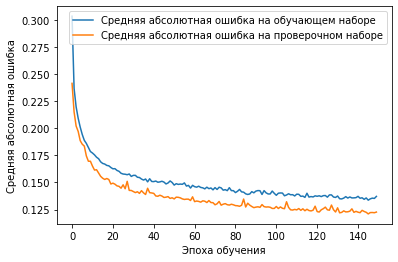

In [ ]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

### Сохраним обученную модель

In [ ]:
modelDrom.save('/content/drive/My Drive/datasets/Drom/my_modelDrom.h5') # сохраним обученную модель

In [ ]:
modelDrom = load_model('/content/drive/My Drive/datasets/Drom/my_modelDrom.h5') # При необходимости загрузить обученную модель

### Проверим результат работы модели на тестовых данных

In [ ]:
prediction_drom = modelDrom.predict(x_test) # сделаем предсказание нашей моделью тестовой выборки
predUnscaled = yScaler.inverse_transform(prediction_drom).flatten() # приведем предсказания к начальному виду до нормирования
y_testUnscaled = yScaler.inverse_transform(y_test).flatten() # приведем y_test к начальному виду до нормирования
# Среднее значение ошибки 
delta = abs(predUnscaled - y_testUnscaled)
print('Среднее значение ошибки ',round((sum(delta) / len(delta)),2)) # 

Среднее значение ошибки  149334.97


In [ ]:
# Пример предсказания одной из строк в тестовой выборке
n_d = 35
test_n_d = xScaler.inverse_transform(x_test[n_d])
print('Бренад: ', name_list[0][int(test_n_d[0])])
print('Модель: ', name_list[1][int(test_n_d[1])])
print('Год выпуска: ',int(test_n_d[2]))
print('Объем двигателя: ', int(test_n_d[3]) )
print('Вид топлива: ', name_list[2][int(test_n_d[4])])
print('Мощность двигателя: ', int(test_n_d[5])) 
print('Вид трансмиссии: ', name_list[3][int(test_n_d[6])])
print('Тип привода: ', name_list[4][int(test_n_d[7])])
print('Пробег: ', int(test_n_d[8]))
print('Комплектация: ', name_list[5][int(test_n_d[9])])
print('Город: ', name_list[6][int(test_n_d[10])])
print('Расположение руля: ', name_list[8][int(test_n_d[12])])
print('Цвет автомобиля: ', name_list[7][int(test_n_d[13])])
print(f'Предсказанная стоимость: {round(predUnscaled[n_d],1)}  руб.')
print(f'Реальная стоимость: {round(y_testUnscaled[n_d],1)} руб.')

Бренад:  Toyota
Модель:  Ractis
Год выпуска:  2015
Объем двигателя:  1500
Вид топлива:  бензин
Мощность двигателя:  109
Вид трансмиссии:  автомат
Тип привода:  передний
Пробег:  37000
Комплектация:  1.5 G Prime Style
Город:  Уссурийск
Расположение руля:  правый
Цвет автомобиля:  голубой
Предсказанная стоимость: 869137.5  руб.
Реальная стоимость: 790000.0 руб.


In [ ]:
modelDrom = load_model('/content/drive/My Drive/datasets/Drom/my_modelDrom.h5') # при необходимости можно загрузить модель с весами

## Задача регрессии, цель которой состоит в том, чтобы спрогнозировать площадь выгоревших лесных пожаров в северо-восточном регионе Португалии с использованием метеорологических и других данных.

### Описание данных

1. Пространственная координата оси X - x на карте парка Монтесиньо: от 1 до 9
2. Пространственная координата оси Y - y на карте парка Монтесиньо: от 2 до 9
3. месяц - месяц года: с января по декабрь
4. день - день недели: от "пн" до "вс"
5. Индекс FFMC - FFMC из системы FWI: от 18,7 до 96,20
6. Индекс DMC - DMC из системы FWI: от 1,1 до 291,3
7. Индекс DC - DC от системы FWI: от 7,9 до 860,6
8. Индекс ISI - ISI от системы FWI: от 0.0 до 56.10
9. temp - температура в градусах Цельсия: от 2,2 до 33,30
10. RH - относительная влажность воздуха в %: от 15,0 до 100
11. ветер - скорость ветра в км/ч: от 0,40 до 9,40
12. дождь - наружный дождь в мм/м2 : от 0,0 до 6,4
13. площадь - сожженная площадь леса (в га): от 0,00 до 1090,84
(эта выходная переменная очень смещена в сторону 0.0, поэтому имеет смысл моделировать с помощью логарифмического преобразования).



### Анализ и обработка данных

In [ ]:
df_forestf = pd.read_csv('/content/drive/My Drive/datasets/ForestFires/forestfires.csv') # загружаем базу данных forestfires

In [ ]:
df_forestf.head() # выведем первые пять строк датафрейма

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df_forestf.info() # проверим данные на предмет соответствия типов и пустых значений.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
colum_num_list = [2,3] # перечень столбцов которые необходимо переводить в числовые значения.
# список уникальных значений для каждого текстового столбца.
name_list = [0,0]
for i, n_l in enumerate(colum_num_list):
    name_list[i] = df_forestf.iloc[:,n_l].unique().tolist()
    print(len(name_list[i]))


12
7


In [ ]:
# заполняем данные
def get_DataF(item_list):
    xTrain = []
    yTrain = []
    for item in item_list:
        stroka = []
        for i, n_l in enumerate(colum_num_list):
            # переводим текстовые значения в числовые путем присвоения индекса уникальности. 
            stroka.append(name_list[i].index(item[n_l])) 
        for i in (0,1,4,5,6,7,8,9,10,11):
            # вставляем значения которые осталичь без изменения.
            stroka.insert(i,item[i])
        yTrain.append(np.log1p(item[12])) # ln(x+1)
        xTrain.append(stroka)
    xTrain = np.array(xTrain, dtype=np.float)
    yTrain = np.array(yTrain, dtype=np.float)
    return (xTrain, yTrain)


### Извлекаем значения загруженного набора

In [ ]:
(xTrain, yTrain) = get_DataF(df_forestf.values) # Извлекаем значения загруженного набора данных
# Размер набора параметров и площадь пожаров
print(xTrain.shape) 
print(yTrain.shape)

(517, 12)
(517,)


### Нормализуем данные с использованием функции нормализации

In [ ]:
# нормализуем данные, на вход должно подаваться в каждой цифре не больше 1 по величине (от 0 до 1 - обычно), иначе сеть плохо учится
#scaler = StandardScaler() # используем функцию нормализации
xScaler = MinMaxScaler() # используем функцию нормализации
xTrainScaled = xScaler.fit_transform(xTrain) # сначала обучаем на тренировочных данных, потом трансформируем их

#yScaler = StandardScaler() # Скармливаем объекту двумерный вектор
yScaler = MinMaxScaler() # Скармливаем объекту двумерный вектор
yTrainScaled = yScaler.fit_transform(yTrain.reshape(-1,1)).flatten() # Нормализуем по нормальному распределению


In [ ]:
# Пример обработанных данных
n = 456 
print(xTrain[n])
print(xTrainScaled[n])
print(yTrain[n])
print(yTrainScaled[n])


[  2.    4.    2.    6.   91.6 248.4 753.8   6.3  16.6  59.    2.7   0. ]
[0.125      0.28571429 0.18181818 1.         0.94064516 0.85217092
 0.87475079 0.11229947 0.46302251 0.51764706 0.25555556 0.        ]
0.0
0.0


### Делим выборки на тестовую и обучающуюю

In [ ]:
# sklearn - библиотека для машинного обучения
# train_test_split - метод разделения на обучающую и проверочную/тестовую выборку
# test_size=0.15 - будет выделено 15% от тренировочных данных 
# shuffle=True - перемешать данные
# x_train - данные для обучения, y_train - правильные ответы для обучения
# x_test - данные для проверки, y_test - правильные ответы для проверки

x_train, x_test, y_train, y_test = train_test_split(xTrainScaled, yTrainScaled, test_size=0.15, shuffle=True)    
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(439, 12)
(78, 12)
(439,)
(78,)


### Создаем нейронную сеть с полученными данными.

In [ ]:
# Обучаем модель полученными данными
def createModel(inputmy):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(inputmy,)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # model.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=['accuracy'])
    model.compile(optimizer=Adam(lr=1e-3), loss='logcosh', metrics=['accuracy'])
    return model


In [ ]:
# Создаём пустую сеть при помощи функции createModel() с заданным аргументом
model = createModel(x_train.shape[1])
# Обучаем сеть
history = model.fit(x_train, 
                    y_train, 
                    epochs=500, # Количество эпох
                    batch_size=50, # Размер батча
                    validation_split=0.2, 
                    verbose=1) # Выводить процесс обучения на каждой эпохе


Epoch 1/500
8/8 [==============================] - 1s 36ms/step - loss: 0.1654 - accuracy: 0.4380 - val_loss: 0.0224 - val_accuracy: 0.4432
Epoch 2/500
8/8 [==============================] - 0s 12ms/step - loss: 0.1969 - accuracy: 0.4141 - val_loss: 0.0198 - val_accuracy: 0.4432
Epoch 3/500
8/8 [==============================] - 0s 11ms/step - loss: 0.1316 - accuracy: 0.3646 - val_loss: 0.0203 - val_accuracy: 0.4432
Epoch 4/500
8/8 [==============================] - 0s 12ms/step - loss: 0.1233 - accuracy: 0.4102 - val_loss: 0.0204 - val_accuracy: 0.4432
Epoch 5/500
8/8 [==============================] - 0s 12ms/step - loss: 0.0923 - accuracy: 0.4437 - val_loss: 0.0213 - val_accuracy: 0.4432
Epoch 6/500
8/8 [==============================] - 0s 12ms/step - loss: 0.0825 - accuracy: 0.3984 - val_loss: 0.0238 - val_accuracy: 0.4432
Epoch 7/500
8/8 [==============================] - 0s 13ms/step - loss: 0.0849 - accuracy: 0.3899 - val_loss: 0.0213 - val_accuracy: 0.4432
Epoch 8/500
8/8 [===

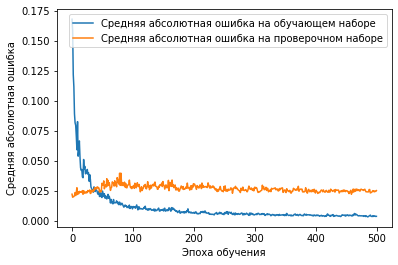

In [ ]:
# графическое отображение работы сети
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

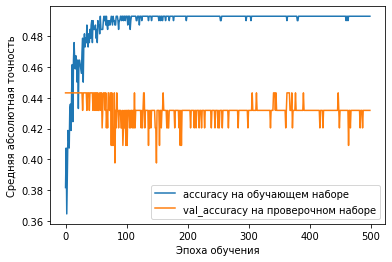

In [ ]:
# графическое отображение работы сети
plt.plot(history.history[list(history.history.keys())[1]], 
         label=list(history.history.keys())[1] + ' на обучающем наборе')
plt.plot(history.history[list(history.history.keys())[3]], 
         label=list(history.history.keys())[3] + ' на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная точность')
plt.legend()
plt.show()

### Проверим результат работы на тестовых данных

In [ ]:
prediction = model.predict(x_test) # сделаем предсказание нашей моделью тестовой выборки
predUnscaled = yScaler.inverse_transform(prediction).flatten() # приведем предсказания к начальному виду до нормирования
y_testUnscaled = yScaler.inverse_transform(y_test.reshape(1,-1)).flatten() # приведем y_test к начальному виду до нормирования
# Среднее значение ошибки 
delta = abs(predUnscaled - y_testUnscaled)
print('Среднее значение ошибки ',sum(delta) / len(delta))

Среднее значение ошибки  1.3146508444995324


In [ ]:
# Пример предсказания одной из строк в тестовой выборке строки 0..77
n_d = 30
print(f'Предсказанная площадь пожара: {np.exp(predUnscaled[n_d])} га') 
print(f'Реальная площадь пожара: {np.exp(y_testUnscaled[n_d])} га')

Предсказанная площадь пожара: 0.7993289828300476 га
Реальная площадь пожара: 4.1899999999999995 га


## Задача: С помощью заданного датасета, пассажиров теплохода Титаник,  определить выживаемость пассажира.

### Описание датасета
Автор: Фрэнк Э. Харрелл-младший, Томас Кейсон
Источник: Биостатистика Вандербильта
:

Оригинальный набор данных "Титаника", описывающий состояние выживания отдельных пассажиров на "Титанике". Данные "Титаника" не содержат информации от экипажа, но они содержат фактический возраст половины пассажиров. Основным источником данных о пассажирах "Титаника" является энциклопедия "Титаника". Наборы данных, используемые здесь, были начаты различными исследователями. Одним из первоисточников является Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, который включает в себя список пассажиров, созданный многими исследователями и отредактированный Майклом А. Финдли.

Томас Кейсон из UVa значительно обновил и улучшил фрейм данных titanic с помощью Энциклопедии Titanica и создал набор данных здесь. Некоторые дубликаты пассажиров были отброшены, многие ошибки исправлены, многие пропущенные возрасты заполнены и созданы новые переменные.


Survived: Выжившие (0 –Нет, 1- Да)

Pclass: Класс каюты, в зависимости от его социального статуса. 1. высокий 2. средний 3. низкий

Name: Имя пассажира написанное в произвольной форме

Sex: Пол пассажира

Age: Возраст пассажира

SibSp: Содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)

Parch: Содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)

Ticket: Номер билета

Fare: Цена билета

Cabin: Каюта

Embarked: Порт посадки . C – Cherbourg, Q – Queenstown, S - Southampton

Boat: информация о спасательных устройствах.

Body: характеристика тела.

home.dest: Место проживания


### Анализ и обработка данных

In [ ]:
df_titanic = pd.read_csv('/content/drive/My Drive/datasets/Titanic/phpMYEkMl.csv') # загружаем базу данных titanic
df_titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"


Для анализа датасета воспользуемся информацией  из открытых источников.

> Блок с отступами


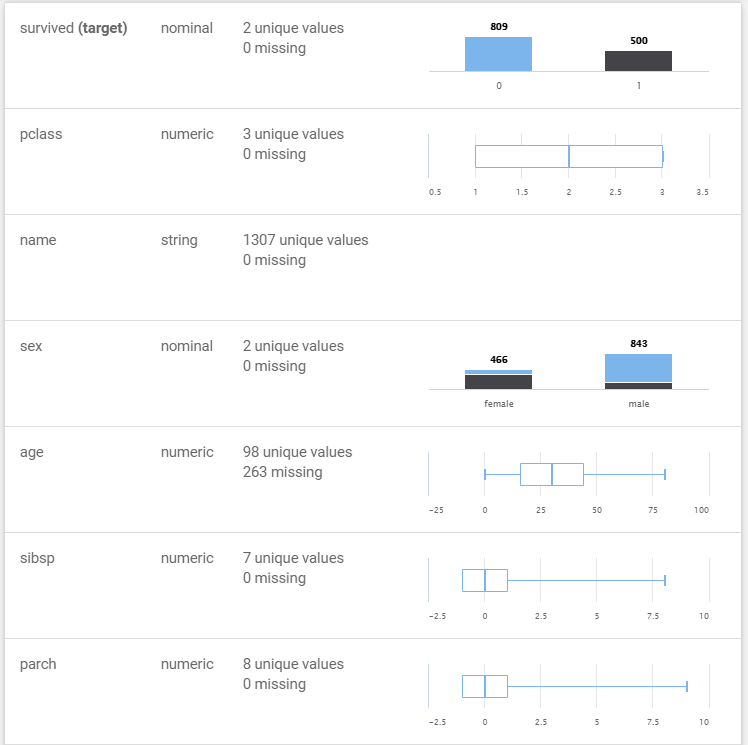

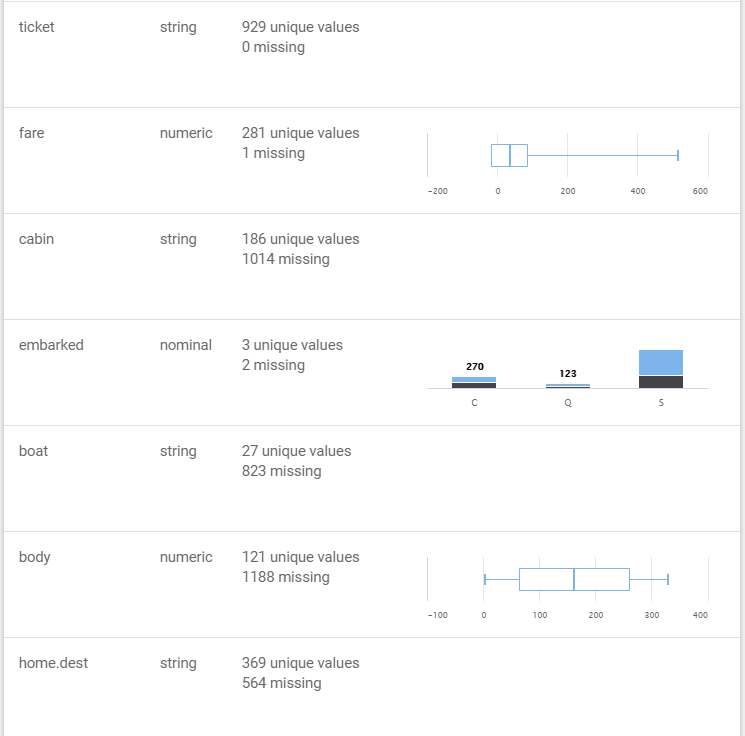

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [ ]:
df_titanic.replace(to_replace= '?', value = np.NaN, inplace=True) # Заменим все значения равные "?" на значение NaN, что бы легче обрабатывать.

In [ ]:
n_columns = 4
maskValue = df_titanic.iloc[:,n_columns].isna() # создаем маску с пустыми значениями для колонки "Age".
df_val = df_titanic.loc[maskValue,:] # создаем вспомогательный датафрейм.
print(df_val.shape) # выведем размерность датафрейма.
df_val.head(10) # выведем на экран строки с пустыми значениями для колонки "Age".

(263, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.925,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George ('George Arthur Brayton')",male,NaN,0,0,111427,26.55,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
69,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55,E33,S,6,NaN,"St Leonards-on-Sea, England Ohio"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
74,1,0,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52,A14,S,NaN,NaN,"Stoughton, MA"
80,1,0,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.55,NaN,S,NaN,NaN,"Roachdale, IN"
106,1,0,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,NaN,NaN,NaN


In [ ]:
# заполним пустые значения возраста, значением которое встречается наибольшее количество раз.
mean_age = df_titanic.iloc[:, n_columns].value_counts().index[0]
df_titanic.iloc[:,n_columns].fillna(value=mean_age,inplace=True) # заполняем все значения поля "Age", имеющие пустые значения.

In [ ]:
df_titanic.loc[df_titanic.iloc[:,n_columns].isna(),:] # проверим остались ли с пустыми значениями для колонки "Age"

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [ ]:
# создадим вспомогательную функцию для определния значения объема по 3 параметрам и возможность задать 3 колонки для сравнения
def Value_titanic_det(a1, a2, a3, n_columns,n0=0, n1=1, n2=2):
    try: # пробуем получить значение по трем ключевым значениям 
        answ = df_titanic.iloc[ ( df_titanic[((df_titanic.iloc[:,n0] == a1) & (df_titanic.iloc[:,n1] == a2) & (df_titanic.iloc[:,n2] == a3))] ).index,\
                            n_columns ].value_counts().index[0]
    except:
        try: # в случае если операция не дала результа определяем значение поля на основе n0 и максимально частоты использования. 
            answ = df_titanic.iloc[(df_titanic[df_titanic.iloc[:,n0] == a1]).index,n_columns].value_counts().index[0]
        except: # в случае если с помощью предыдущих операций, мы не получили результат, то возвращаем значение, чаще встречающееся по все базе
            answ = df_titanic.iloc[:,n_columns].value_counts().index[0]
    
    return answ

In [ ]:
n_columns = 8
df_val = df_titanic.loc[df_titanic.iloc[:,n_columns].isna(),:] # проверим  пустые значениями для колонки "Fare"
df_val

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261,NaN


In [ ]:
fare_val = Value_titanic_det(df_val.iloc[0,0],df_val.iloc[0,7],df_val.iloc[0,8],n_columns, n1=7, n2=8)
df_titanic.iloc[:,n_columns].fillna(value=fare_val,inplace=True) # заполняем все значения поля "fare", имеющие пустые значения.

In [ ]:
n_columns = 9
df_val = df_titanic.loc[df_titanic.iloc[:,n_columns].isna(),:] # проверим  пустые значениями для колонки "Cabin"
df_val

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C,NaN,22,"Montevideo, Uruguay"
13,1,1,"Barber, Miss. Ellen 'Nellie'",female,26,0,0,19877,78.85,NaN,S,6,NaN,NaN
15,1,0,"Baumann, Mr. John D",male,24,0,0,PC 17318,25.925,NaN,S,NaN,NaN,"New York, NY"
23,1,1,"Bidois, Miss. Rosalie",female,42,0,0,PC 17757,227.525,NaN,C,4,NaN,NaN
25,1,0,"Birnbaum, Mr. Jakob",male,25,0,0,13905,26,NaN,C,NaN,148,"San Francisco, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328,NaN
1305,3,0,"Zabour, Miss. Thamine",female,24,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,NaN,C,NaN,NaN,NaN


In [ ]:
# учитывая тот факт, что значений заполненных очень мало, 
# будем исходить из того, что в дальнейшем не будем учитывать данные этого столбца 9

In [ ]:
n_columns = 10
df_val = df_titanic.loc[df_titanic.iloc[:,n_columns].isna(),:] # проверим  пустые значениями для колонки "embarked"
df_val

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN,6,NaN,"Cincinatti, OH"


In [ ]:
list_val = df_val.iloc[:,[0,7,8]].values.tolist() # переводим для того, что бы пробежаться по значениям
list_value =[Value_titanic_det(a1,a2,a3,n_columns, n1=7, n2=8) for a1,a2,a3 in list_val] # создадим вспомогательный список со значениям поля 
df_val.loc[:,'New'] = list_value # присвоим новой колонке значения списка с рассчитанными значениями 

In [ ]:
df_titanic.iloc[:,n_columns].fillna(value=df_val.iloc[:,14],inplace=True)# заполняем все значения поля "embarked", имеющие пустые значения.

In [ ]:
n_columns = 11
df_val = df_titanic.loc[df_titanic.iloc[:,n_columns].isna(),:] # проверим  пустые значениями для колонки "boat"
df_val

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C,NaN,22,"Montevideo, Uruguay"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328,NaN
1305,3,0,"Zabour, Miss. Thamine",female,24,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,NaN,C,NaN,NaN,NaN


In [ ]:
df_titanic.iloc[:,n_columns].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [ ]:
n_columns = 12
df_val = df_titanic.loc[df_titanic.iloc[:,n_columns].isna(),:] # проверим  пустые значениями для колонки "body"
df_val

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,0,"Yousif, Mr. Wazli",male,24,0,0,2647,7.225,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,24,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1305,3,0,"Zabour, Miss. Thamine",female,24,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,NaN,C,NaN,NaN,NaN


In [ ]:
df_titanic.iloc[:,n_columns].unique()

array([nan, '135', '22', '124', '148', '208', '172', '269', '62', '133',
       '275', '147', '110', '307', '38', '80', '45', '258', '126', '292',
       '175', '249', '230', '122', '263', '234', '189', '166', '207',
       '232', '16', '109', '96', '46', '245', '169', '174', '97', '18',
       '130', '17', '295', '286', '236', '322', '297', '155', '305', '19',
       '75', '35', '256', '149', '283', '165', '108', '121', '52', '209',
       '271', '43', '15', '101', '287', '81', '294', '293', '190', '72',
       '103', '79', '259', '260', '142', '299', '171', '9', '197', '51',
       '187', '68', '47', '98', '188', '69', '306', '120', '143', '156',
       '285', '37', '58', '70', '196', '153', '61', '53', '201', '309',
       '181', '173', '89', '4', '206', '327', '119', '7', '32', '67',
       '284', '261', '176', '50', '1', '255', '298', '314', '14', '131',
       '312', '328', '304'], dtype=object)

In [ ]:
n_columns = 13
df_val = df_titanic.loc[df_titanic.iloc[:,n_columns].isna(),:] # проверим  пустые значениями для колонки "home.dest"
df_val

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
13,1,1,"Barber, Miss. Ellen 'Nellie'",female,26,0,0,19877,78.85,NaN,S,6,NaN,NaN
18,1,1,"Bazzani, Miss. Albina",female,32,0,0,11813,76.2917,D15,C,8,NaN,NaN
23,1,1,"Bidois, Miss. Rosalie",female,42,0,0,PC 17757,227.525,NaN,C,4,NaN,NaN
24,1,1,"Bird, Miss. Ellen",female,29,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
28,1,1,"Bissette, Miss. Amelia",female,35,0,0,PC 17760,135.6333,C99,S,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328,NaN
1305,3,0,"Zabour, Miss. Thamine",female,24,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,NaN,C,NaN,NaN,NaN


In [ ]:
list_val = df_val.iloc[:,[10,7,8]].values.tolist() # переводим для того, что бы пробежаться по значениям
list_value =[Value_titanic_det(a1,a2,a3,n_columns,n0=10, n1=7, n2=8) for a1,a2,a3 in list_val] # создадим вспомогательный список со значениям поля 
df_val.loc[:,'New'] = list_value # присвоим новой колонке значения списка с рассчитанными значениями 

In [ ]:
df_titanic.iloc[:,n_columns].fillna(value=df_val.iloc[:,14],inplace=True) # заполняем все значения поля "home.dest", имеющие пустые значения.

In [ ]:
df_titanic.drop(df_titanic.iloc[:,[9,11,12]],axis=1, inplace=True) # удалим те столбцы которые не будем использовать

In [ ]:
df_titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,S,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,S,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,S,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,S,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,C,"Montevideo, Uruguay"


### Сохраним заполненную базу данных.

In [ ]:
df_titanic.to_csv('/content/drive/My Drive/datasets/Titanic/titanic_upd.csv',index_label=False) # сохраним исправленную базу данных titanic

In [ ]:
df_titanic = pd.read_csv('/content/drive/My Drive/datasets/Titanic/titanic_upd.csv') # загружаем базу данных titanic

In [ ]:
df_titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C,"Montevideo, Uruguay"


### Переведем все текстовые данные в числовые.

In [ ]:
colum_num_list = [2,3,4,7,8,9,10] # перечень столбцов которые необходимо переводить в числовые значения
# список уникальных значений для каждого текстового столбца
name_list = [0,0,0,0,0,0,0]
for i, n_l in enumerate(colum_num_list):
    name_list[i] = df_titanic.iloc[:,n_l].unique().tolist()
    print(len(name_list[i]))


1307
2
98
929
281
3
369


In [ ]:
# заполняем данные
def get_Data_Titanic(item_list):
    xTrain = []
    yTrain = []
    for item in item_list:
        stroka = []
        for i, n_l in enumerate(colum_num_list):
            # переводим текстовые значения в числовые путем присвоения индекса уникальности. 
            stroka.append(name_list[i].index(item[n_l])) 
        for i in (0,5,6):
            # вставляем значения которые осталиcь без изменения.
            stroka.insert(i,item[i]) 
        yTrain.append(item[1])
        xTrain.append(stroka)
    xTrain = np.array(xTrain, dtype=np.float)
    yTrain = np.array(yTrain, dtype=np.float)
    return (xTrain, yTrain)

### Извлекаем значения полученного набора данных.

In [ ]:
(xTrain, yTrain) = get_Data_Titanic(df_titanic.values) # Извлекаем значения загруженного набора данных
# Размер набора параметров и стоимость автомобиля
print(xTrain.shape) 
print(yTrain.shape)

(1309, 10)
(1309,)


### Нормализуем данные с использованием функции нормализации данных.

In [ ]:
# нормализуем данные, на вход должно подаваться в каждой цифре не больше 1 по величине (от 0 до 1 - обычно), иначе сеть плохо учится
xScaler = MinMaxScaler() # используем функцию нормализации
xTrainScaled = xScaler.fit_transform(xTrain) # сначала обучаем на тренировочных данных, потом трансформируем их

yScaler = MinMaxScaler() # Скармливаем объекту двумерный вектор
yTrainScaled = yScaler.fit_transform(yTrain.reshape(-1,1)).flatten() # Нормализуем по нормальному распределению


### Делим выборки на тестовую и обучающую

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xTrainScaled, yTrainScaled, test_size=0.15, shuffle=True)    
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(1112, 10)
(197, 10)
(1112,)
(197,)


### Создаем нейронную сеть с полученными данными

In [ ]:
# Создаем модель
def createModelTitanic(inputmy):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(inputmy,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(800, activation='tanh'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=1e-3), loss='binary_crossentropy')
    return model


In [ ]:
# Обучаем модель полученными данными
modelTitanic = createModelTitanic(x_train.shape[1])
history = modelTitanic.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=50,
                    validation_split=0.15, 
                    verbose=1)

Epoch 1/30
19/19 [==============================] - 2s 40ms/step - loss: 0.5552 - val_loss: 0.5664
Epoch 2/30
19/19 [==============================] - 0s 9ms/step - loss: 0.4869 - val_loss: 0.5573
Epoch 3/30
19/19 [==============================] - 0s 9ms/step - loss: 0.4477 - val_loss: 0.5154
Epoch 4/30
19/19 [==============================] - 0s 9ms/step - loss: 0.4473 - val_loss: 0.5015
Epoch 5/30
19/19 [==============================] - 0s 9ms/step - loss: 0.4386 - val_loss: 0.5015
Epoch 6/30
19/19 [==============================] - 0s 8ms/step - loss: 0.4356 - val_loss: 0.4952
Epoch 7/30
19/19 [==============================] - 0s 8ms/step - loss: 0.4427 - val_loss: 0.4598
Epoch 8/30
19/19 [==============================] - 0s 10ms/step - loss: 0.4355 - val_loss: 0.4589
Epoch 9/30
19/19 [==============================] - 0s 9ms/step - loss: 0.4109 - val_loss: 0.4620
Epoch 10/30
19/19 [==============================] - 0s 10ms/step - loss: 0.4630 - val_loss: 0.4406
Epoch 11/30
19/1

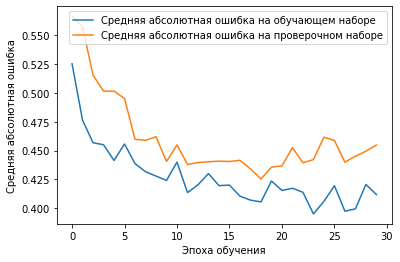

In [ ]:
# графическое отображение работы сети
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

### Проверим результат на тестовых данных.

In [ ]:
prediction_titanic = modelTitanic.predict(x_test) # сделаем предсказание нашей моделью тестовой выборки
predUnscaled = yScaler.inverse_transform(prediction_titanic).flatten() # приведем предсказания к начальному виду до нормирования
y_testUnscaled = yScaler.inverse_transform(y_test.reshape(1,-1)).flatten()# приведем y_test к начальному виду до нормирования
# Среднее значение ошибки 
delta = abs(round(predUnscaled[n_d],0) - y_testUnscaled)
print(f'Средний процент ошибки  {round( (sum(delta) / len(delta) * 100), 2)} %' )

Средний процент ошибки  40.1 %


In [ ]:
# Пример предсказания одной из строк в тестовой выборке строки 0..196
n_d = 80
print(f'Предсказанная возможность выжить: {round(predUnscaled[n_d],0)} ') 
print(f'Реально пассажир выжил : {y_testUnscaled[n_d]} ')

Предсказанная возможность выжить: 1.0 
Реально пассажир выжил : 1.0 


#Оценка функции ошибки для задачи регрессии в нейронных сетях.

Функция ошибки   определяет величину ошибки прогнозирования, которая показывает, как сильно прогнозное значение отклонилось от фактического. 
Рассмотрим наиболее часто применяемые для решения задач регрессии.

     

## MAPE – средняя абсолютная ошибка прогнозирования в процентах

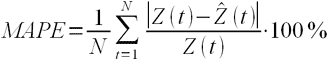


- Для каждой позиции рассчитывается абсолютная ошибка прогноза (прогноз вычитается из факта по модулю) — Absolute Error
-  Для каждой позиции рассчитывается абсолютная процентная ошибка прогноза (абсолютная ошибка прогноза делится на фактический показатель) — Absolute Percent Error
- Находится среднее арифметическое всех абсолютных процентных ошибок прогноза (абсолютные процентные ошибки суммируются и делятся на количество) — Mean Absolute Percent Error
       
Вместо среднего арифметического всех абсолютных процентных ошибок прогноза можно использовать медиану числового ряда (MdAPE — Median Absolute Percent Error), она наиболее устойчива к выбросам.

##MAE – средняя абсолютная ошибка

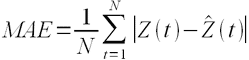

-  Для каждой позиции рассчитывается абсолютная ошибка прогноза (прогноз вычитается из факта по модулю) — Absolute Error
-  Находиться среднее арифметическое всех абсолютных ошибок.

##MSE – среднеквадратичная ошибка

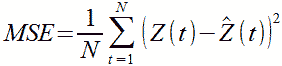

-  Для каждой позиции рассчитывается квадрат отклонений (разница между фактом и прогнозом, возведенная в квадрат) — Square Error
- Затем рассчитывается среднее арифметическое (сумма квадратов отклонений, деленное на количество) — MSE — Mean Square Error

##RMSE – квадратный корень из среднеквадратичной ошибки

image.png

- Извлекаем корень из результата полученного в предыдущем примере.

Рассматривая функции потерь, описанные выше, стоит отметить, что все они пригодны и очень часто используются при решении задач регрессии, но у всех есть свои недостатки. MAE, например, слишком мягок, когда средняя ошибка мала; MSE, с другой стороны, позволяет вычисленной ошибке взорваться когда у вас есть выбросы в наборах данных, существенно искажая вычисленную ошибку.

Другой функцией потерь, которая пытается объединить лучшее из обоих миров, является функция потерь LOGCOSH. Она работает как MSE, но сглажена в сторону больших ошибок (предположительно вызванных выбросами), так что итоговая оценка ошибок не влияет полностью.

##LOGCOSH — это логарифм гиперболического косинуса ошибки предсказания.

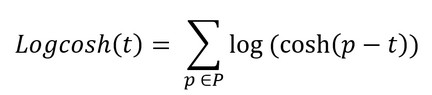

Обратим внимание на график. Где можно видеть, что потери Logcosh, для некоторого целевого значения ( в данном случае target = 0) равны нулю при целевом значении и увеличиваются, когда прогнозируемое значение находиться дальше от целевого значения.

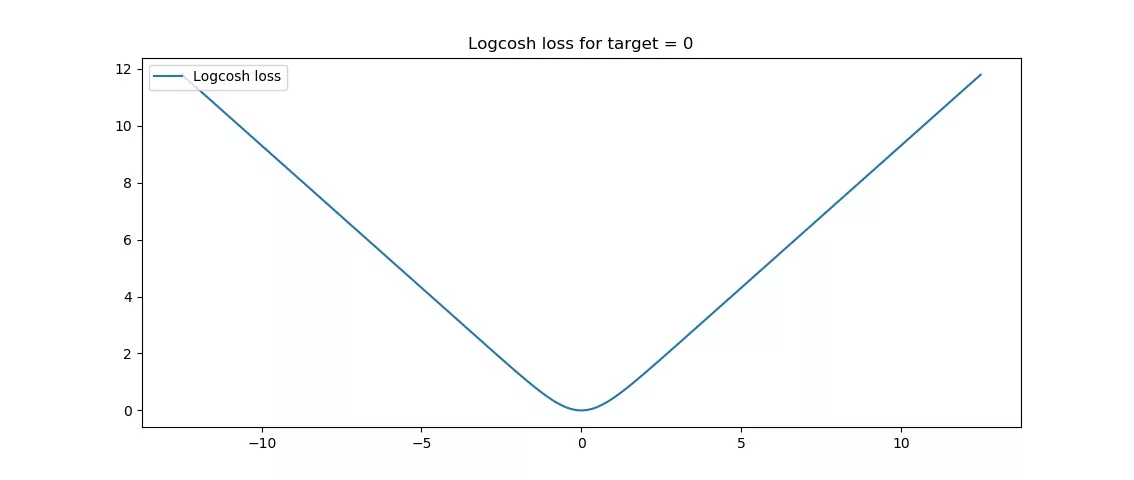

Можно сказать, что log(cosh(x) примерно равен x**2 /2 для малого x 

и abs(x) — log(2)  для большого x. 

Это означет, что  Logcosh работает в основном как среднеквадратичная ошибка, но не будет так сильно зависеть от случайного сильно неправильного предсказания.

В случае когда результат находится между нулём и единицей, а целевая переменная принимает значения только 0 и 1. Нужна другая функция ошибок.

##Кросс-энтропия (или логарифмическая функция потерь – log loss)

Кросс-энтропия измеряет расхождение между двумя вероятностными распределениями. Если кросс-энтропия велика, это означает, что разница между двумя распределениями велика, а если кросс-энтропия мала, то распределения похожи друг на друга.

##Binary cross entropy

В случае бинарной классификации (M=2), формула имеет вид:

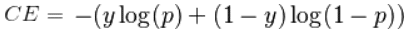

При Binary cross entropy каждая предсказанная вероятность сравнивается с фактическим значением класса (0 или 1), и вычисляется оценка, которая штрафует вероятность на основе расстояния от ожидаемого значения.

На приведенном ниже графике показан диапазон возможных значений  функции потерь с учетом истинного наблюдения (y = 1). Когда прогнозируемая вероятность приближается к 1, функция потерь медленно уменьшается. Однако при уменьшении прогнозируемой вероятности она быстро возрастает.

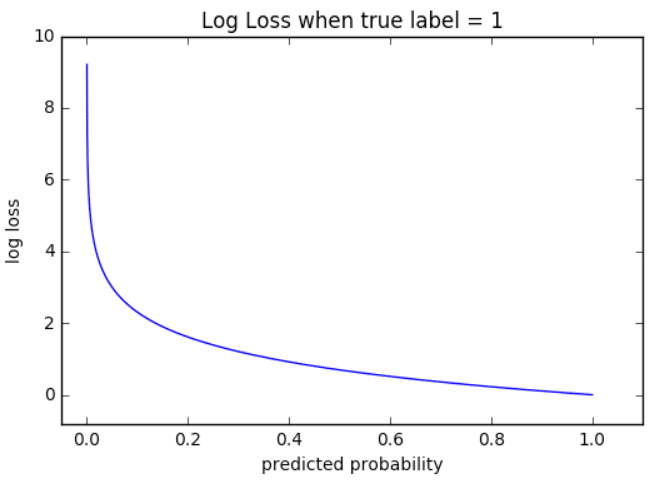

Логарифмическая функция потерь наказывает оба типа ошибок, но особенно те прогнозы, которые являются достоверными и ошибочными!

##Связь точности и ошибки прогнозирования.

Точность прогнозирования есть понятие прямо противоположное ошибке прогнозирования. Если ошибка прогнозирования велика, то точность мала и наоборот, если ошибка прогнозирования мала, то точность велика. По сути дела оценка ошибки прогноза MAPE есть обратная величина для точности прогнозирования — зависимость здесь простая.
Точность прогноза в % = 100% – MAPE


Справедливости ради, говоря о прогнозировании, величину точности оценивать не принято. Всегда оценивают, то есть определяют значение именно ошибки прогноза, то есть величину MAPE и/или MAE. Однако нужно понимать, что если MAPE = 5%, то точность прогнозирования = 95%. Говоря о высокой точности, мы всегда говорим о низкой ошибки прогноза и в этой области недопонимания быть не должно. Вы практически не найдете материалов о прогнозировании, в которых приведены оценки именно точности прогноза, хотя с точки зрения здравого смысла корректней говорить именно о высокой точности. При этом величина MAPE является количественной оценкой именно ошибки, и эта величина нам ясно говорит и о точности прогнозирования, исходя из приведенной выше простой формулы. Таким образом, оценивая ошибку, мы всегда оцениваем точность прогнозирования.

# Литература:



1.   https://www.openml.org/d/40945
2.   http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt
3. https://ru.wikipedia.org/wiki/Регрессия
4. https://portal.tpu.ru/SHARED/i/INNA/Stady/planir%20izm%20exp/Tab/Основы%20регрессионного%20анализа.pdf
5. https://edu.tltsu.ru/sites/sites_content/site216/html/media96435/lec_9.pdf
6. https://habr.com/ru/post/307004/
7. https://help.loginom.ru/userguide/processors/datamining/neural-network-regression.html
8. https://ru.other.wiki/wiki/General_regression_neural_network






